In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateTypes, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)

from aoe2mapgenerator.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.common.constants.constants import DEFAULT_EMPTY_VALUE, BASE_SCENE_DIR, BASE_SCENARIO_NAME, TEMPLATE_DIR
from aoe2mapgenerator.common.enums.enum import GateTypes
import multiprocessing as mp
from aoe2mapgenerator.map.map import Map
import os
from aoe2mapgenerator.serializer.serializer import serialize_map, get_all_functions_and_arguments, _get_functions, _get_function_arguments
from aoe2mapgenerator.maingenerator import main_map_generator

In [2]:
get_all_functions_and_arguments(Map)

add_borders
['self', 'map_layer_type_list', 'array_space_type_list', 'obj_type', 'margin', 'player_id', 'place_on_n_maps']
add_borders_all
['self', 'map_layer_type_list', 'array_space_type_list', 'border_type', 'margin', 'player_id', 'place_on_n_maps']
generate_voronoi_cells
['self', 'interpoint_distance', 'map_layer_type_list', 'array_space_type_list']
get_array_from_map_layer_type
['self', 'map_layer_type']
get_dictionary_from_map_layer_type
['self', 'map_layer_type']
get_intersection_of_spaces
['self', 'map_layer_type_list', 'array_space_type_list']
get_map_layer
['self', 'map_layer_type']
get_world_partition
['self', 'start_point', 'points_needed', 'clumping']
place_gate_on_four_sides
['self', 'map_layer_type_list', 'array_space_type_list', 'gate_type', 'player_id', 'place_on_n_maps']
place_groups
['self', 'map_layer_type_list', 'array_space_type_list', 'obj_type_list', 'player_id', 'groups', 'group_size', 'group_density', 'groups_density', 'clumping', 'clumping_func', 'margin', 's

{'add_borders': ['self',
  'map_layer_type_list',
  'array_space_type_list',
  'obj_type',
  'margin',
  'player_id',
  'place_on_n_maps'],
 'add_borders_all': ['self',
  'map_layer_type_list',
  'array_space_type_list',
  'border_type',
  'margin',
  'player_id',
  'place_on_n_maps'],
 'generate_voronoi_cells': ['self',
  'interpoint_distance',
  'map_layer_type_list',
  'array_space_type_list'],
 'get_array_from_map_layer_type': ['self', 'map_layer_type'],
 'get_dictionary_from_map_layer_type': ['self', 'map_layer_type'],
 'get_intersection_of_spaces': ['self',
  'map_layer_type_list',
  'array_space_type_list'],
 'get_map_layer': ['self', 'map_layer_type'],
 'get_world_partition': ['self', 'start_point', 'points_needed', 'clumping'],
 'place_gate_on_four_sides': ['self',
  'map_layer_type_list',
  'array_space_type_list',
  'gate_type',
  'player_id',
  'place_on_n_maps'],
 'place_groups': ['self',
  'map_layer_type_list',
  'array_space_type_list',
  'obj_type_list',
  'player_id',

In [5]:
_get_functions(Map)

['add_borders',
 'add_borders_all',
 'generate_voronoi_cells',
 'get_array_from_map_layer_type',
 'get_dictionary_from_map_layer_type',
 'get_intersection_of_spaces',
 'get_map_layer',
 'get_world_partition',
 'place_gate_on_four_sides',
 'place_groups',
 'place_template',
 'set_point',
 'visualize_map',
 'visualize_mat',
 'visualize_points',
 'voronoi']

In [4]:
_get_map_function_arguments(Map)

TypeError: _get_map_function_arguments() missing 1 required positional argument: 'function_name'

In [28]:
a = Map(1)

In [35]:
_get_map_function_arguments(a, "voronoi")

['self', 'interpoint_distance', 'map_layer_type_list', 'array_space_type_list']

In [36]:
dir(a)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_voronoi_cell_numbers',
 '_check_placement',
 '_convert_yaml_command_to_python_data_types',
 '_create_dictionary_mapping',
 '_distance_to_edge',
 '_generate_poisson_voronoi_point_distribution',
 '_get_average_point_position',
 '_get_first_point_in_given_direction',
 '_get_random_element_from_list',
 '_get_set_with_min_members',
 '_is_on_border',
 '_place',
 '_place_gate_closest_to_point',
 '_place_group',
 '_poisson_disk_sample',
 '_valid',
 '_validate_user_included_required_yaml_fields',
 '_validate_user_kwarg_input',
 '_voronoi_grow_single',
 'add_borders',
 'add_borders_all',
 'convert_array_space_type',
 'deco

In [29]:
_get_map_functions(a)

['template_names',
 'size',
 'unit_map_layer',
 'zone_map_layer',
 'terrain_map_layer',
 'decor_map_layer',
 'elevation_map_layer',
 'world_partition',
 'get_world_partition',
 'get_map_layer',
 'set_point',
 'voronoi',
 'load_yaml',
 'place_template',
 'string_to_aoe2_enum_type',
 'convert_array_space_type',
 'place_groups',
 'add_borders',
 'add_borders_all',
 'default_clumping_func',
 'place_gate_on_four_sides',
 'get_dictionary_from_map_layer_type',
 'get_array_from_map_layer_type',
 'get_intersection_of_spaces',
 'visualize_points',
 'visualize_mat',
 'visualize_map',
 'global_zone_counter',
 'generate_voronoi_cells']

In [6]:
def fun():
    return 1+1

In [9]:
n = 10**8

In [14]:
for i in range(n):
    fun()

for i in range(n):
    fun()

In [2]:
input_name = "1 vs 7 default.aoe2scenario"
output_name = "0_BASIC_SCENARIO.aoe2scenario"

In [5]:
main_map_generator(BASE_SCENE_DIR+BASE_SCENARIO_NAME, BASE_SCENE_DIR+"AWESOMEMAP.aoe2scenario", TEMPLATE_DIR)

BUILD CITY
NEW TEMPLATE LOADED: oak_forest.yaml
NEW TEMPLATE LOADED: walls.yaml
NEW TEMPLATE LOADED: City.yaml
BUILD FOREST
NEW TEMPLATE LOADED: snow_forest.yaml
BUILD CITY
BUILD CITY
BUILD FOREST
BUILD FOREST

[15:32:46] Reading file: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\BASE_SCENARIO.aoe2scenario'
[15:32:46] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.51
>>> Scenario variant: 'Age of Empires 2'
##########################################

[15:32:46] Loading scenario structure finished successfully.
[15:32:46] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Tr

ValueError: X and Y need to be: 0 <= n < map_size

In [3]:
# start_time = time()
# # result = np.array(lst)
# lst = np.array(lst)
# end_time = time()
# print(end_time-start_time)

In [2]:
map_size = 256
map = Map(map_size)
new_zones = map.voronoi(75)

# keys = list(map.get_map_layer(MapLayerType.UNIT).dict.keys())

# for city_zone in keys:
#     map.add_borders(
#         [MapLayerType.TERRAIN, MapLayerType.UNIT, MapLayerType.ZONE, MapLayerType.DECOR],
#         [city_zone, city_zone, city_zone,city_zone],
#         TerrainId.ROAD_FUNGUS,
#         margin = 2,
#         )

In [5]:
json = serialize_map(map)

In [3]:
def build_city(zone, player_id):
    """
    Build city in zone
    """
    print("BUILD CITY")

    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.UNIT, MapLayerType.DECOR],
        [zone, zone, zone, zone],
        TerrainId.GRASS_2,
        margin = 10
        )

    map.place_template(
            'oak_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, (TerrainId.GRASS_2, PlayerId.GAIA), zone, zone],
            player_id = player_id,
        )

    map.place_template(
            'walls.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, zone, zone, zone],
            player_id = player_id,
        )
    
    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.UNIT, MapLayerType.DECOR],
        [zone, zone, zone, zone],
        TerrainId.ROAD_FUNGUS,
        margin = 1
        )
    
    city_zones = map.voronoi(35,
                [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
                [zone, zone, zone, zone],
            )
    
    for city_zone in city_zones:
        map.add_borders(
            [MapLayerType.TERRAIN, MapLayerType.UNIT, MapLayerType.ZONE, MapLayerType.DECOR],
            [city_zone, city_zone, city_zone, city_zone],
            TerrainId.ROAD_FUNGUS,
            margin = 1
            )
        
        map.place_template(
            'oak_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [city_zone, city_zone, city_zone, city_zone],
        )

        map.place_template(
            'City.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [city_zone, city_zone, city_zone, city_zone],
            player_id = player_id,
        )

In [4]:
def build_snow_forest(zone, player_id):
    """
    Build snow forest in zone
    """
    print("BUILD FOREST")
    
    map.place_template(
            'snow_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, zone, zone, zone],
            player_id = player_id,
        )

In [5]:
counter = 0
for i, zone in enumerate(new_zones):
    # print(zone)
    counter += 1
    if counter >= 9:
        counter = 1
    
    if random.random() > 0.5:
        build_city(zone, PlayerId(counter))
    else:
        build_snow_forest(zone, PlayerId(counter))
        

BUILD CITY
NEW TEMPLATE LOADED: oak_forest.yaml
NEW TEMPLATE LOADED: walls.yaml
NEW TEMPLATE LOADED: City.yaml
BUILD FOREST
NEW TEMPLATE LOADED: snow_forest.yaml
BUILD CITY
BUILD CITY
BUILD FOREST
BUILD FOREST
BUILD FOREST
BUILD FOREST


In [42]:
def _get_map_function_arguments(map, function_name: str) -> list:
    """
    Retrieves a list of arguments for a given function.
    
    Args:
        map (Map): Map object to modify.
        function_name (str): Name of the function to retrieve arguments from.
    
    Returns: 
        list: List of arguments for the given function.
    """
    return [arg for arg in map.__getattribute__(function_name).__code__.co_varnames if arg != 'self']

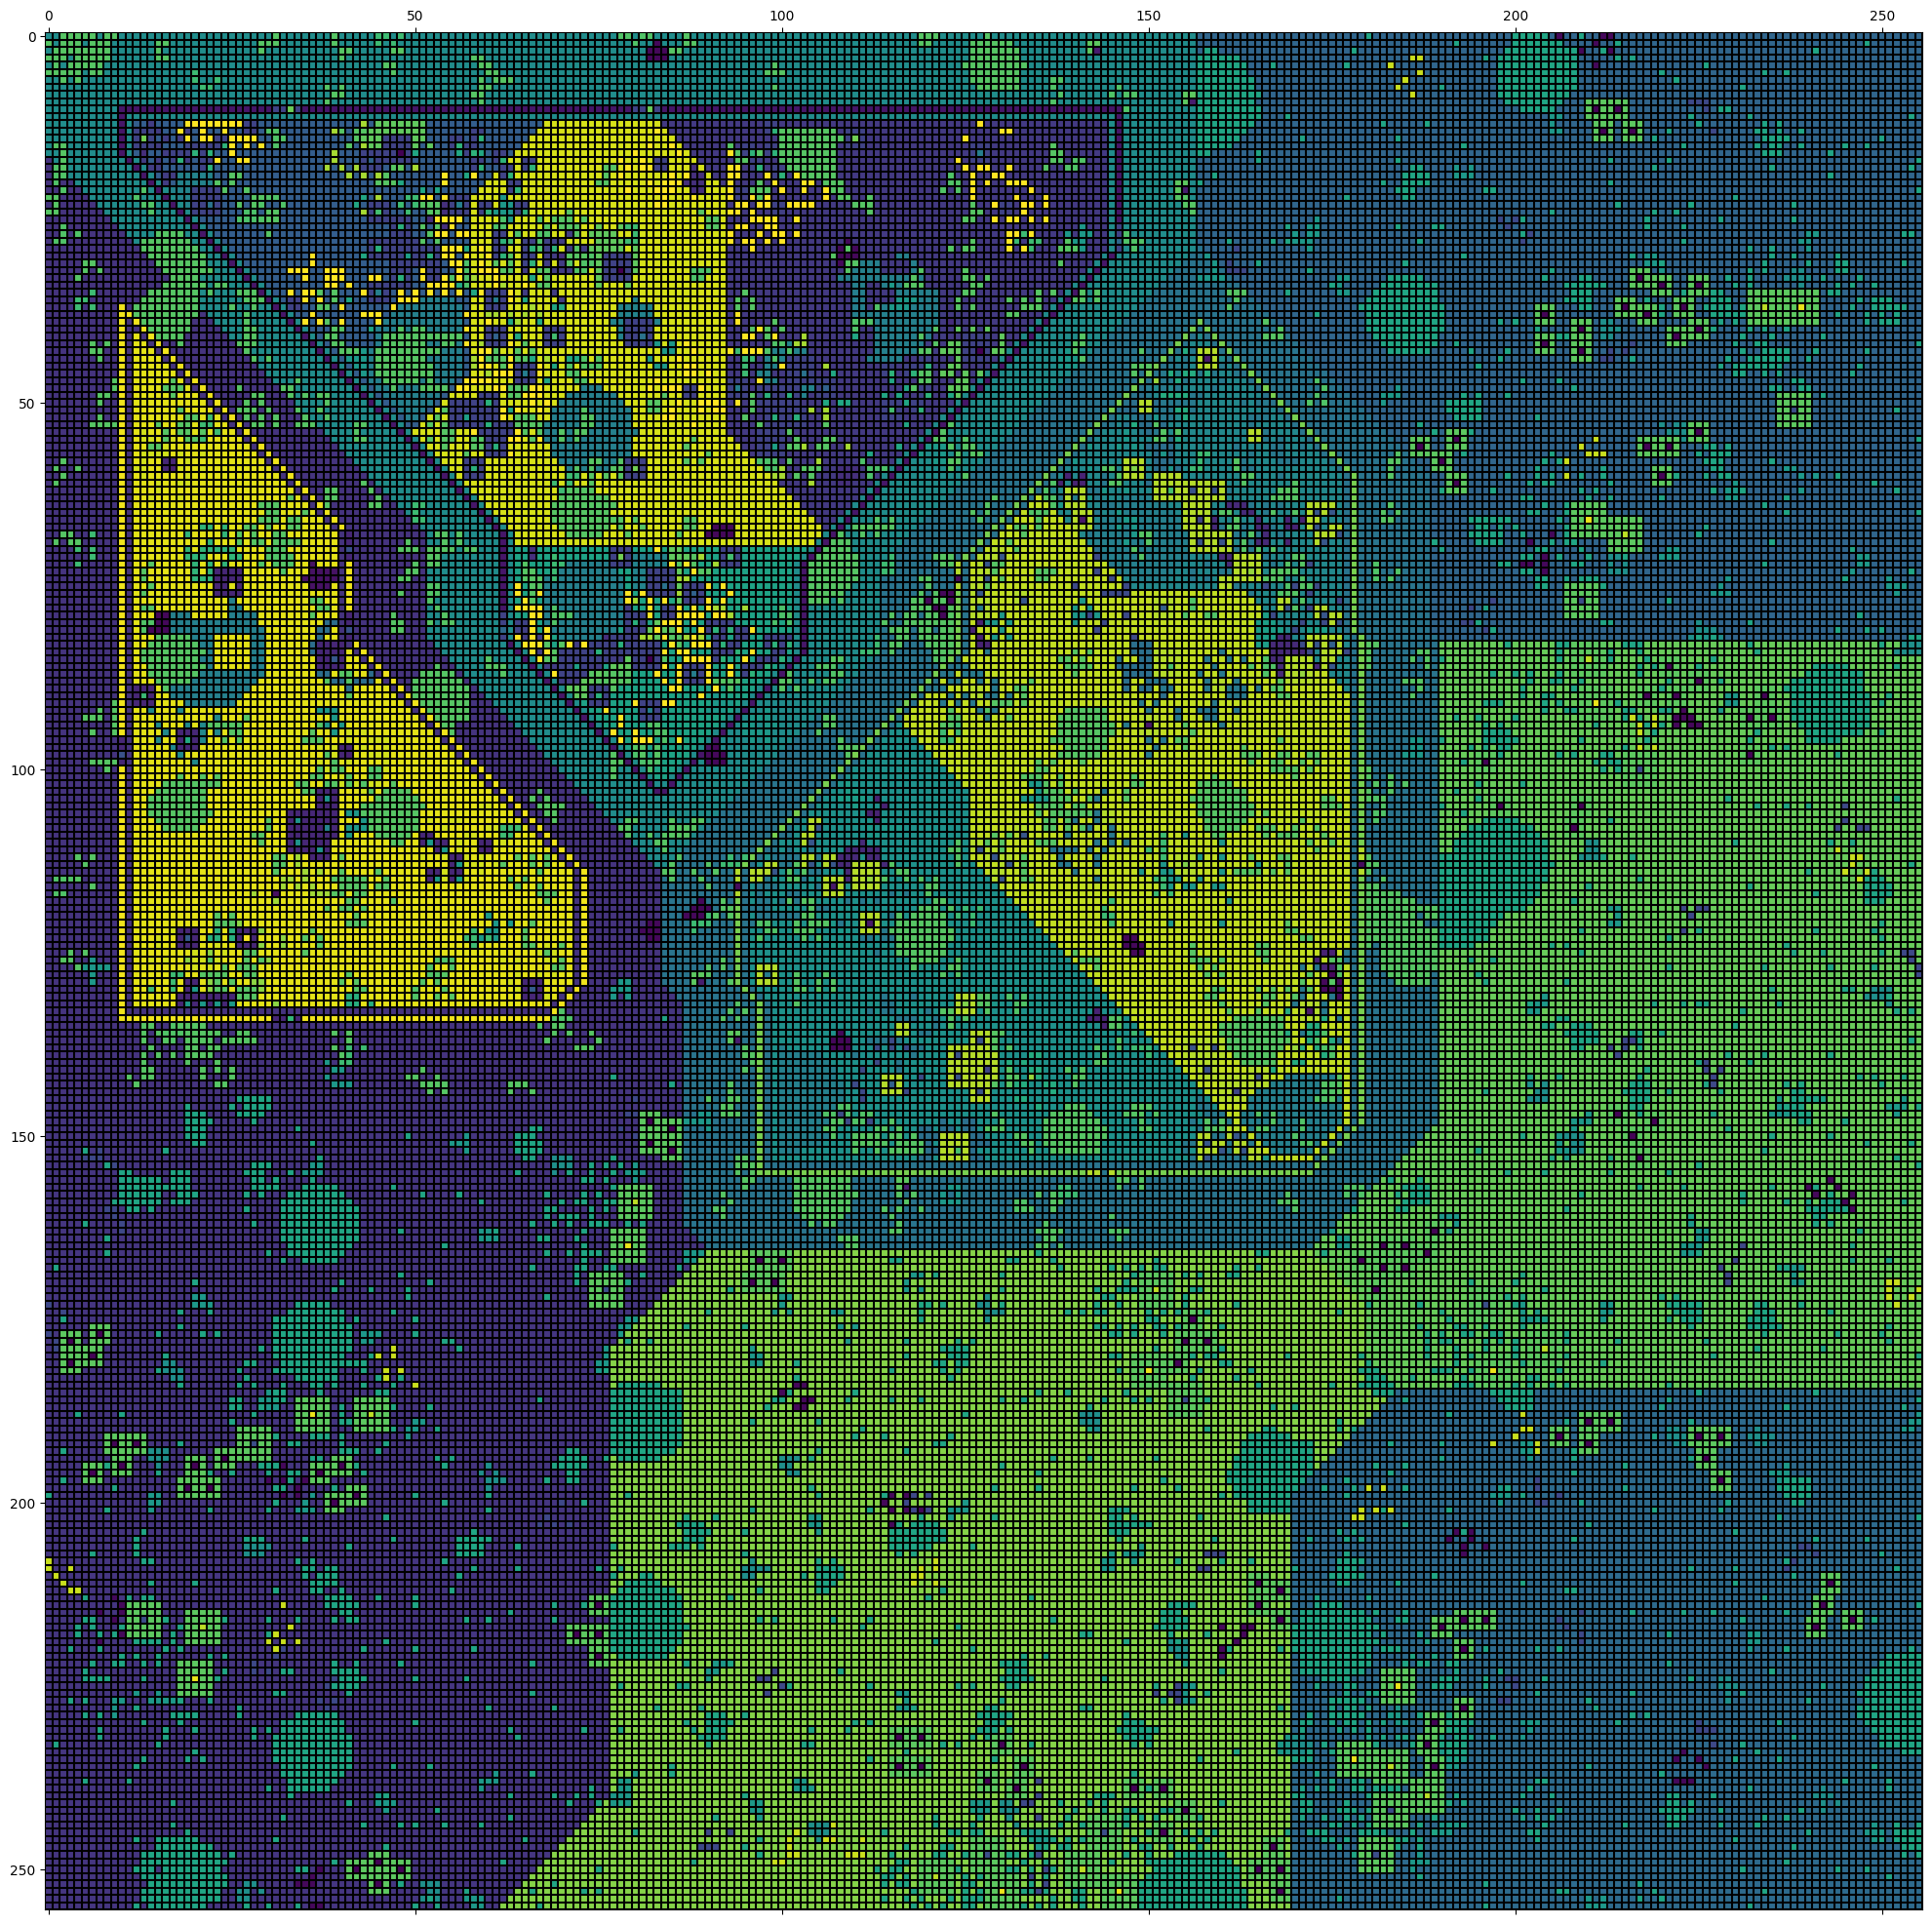

In [6]:
map.visualize_mat(MapLayerType.UNIT, include_zones=False)

In [7]:
scenario = Scenario(map)


[15:27:11] Reading file: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\BASE_SCENARIO.aoe2scenario'
[15:27:11] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.51
>>> Scenario variant: 'Age of Empires 2'
##########################################

[15:27:11] Loading scenario structure finished successfully.
[15:27:11] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
[15:27:11] Parsing scenario file finished successfully.

[15:27:11] Setting up managers ...
	✔ MessageManagereManager...
	✔ PlayerManagerrManager...
	✔ MapManagerpM

In [8]:
scenario.change_map_size(map_size)
scenario.write_map()
scenario.save_file(os.path.join(BASE_SCENE_DIR, "TestScenario2.aoe2scenario"))


[15:27:14] Reconstructing sections and structs from managers...
	✔ MessageManagerssageManager...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
[15:27:16] Reconstruction finished successfully.

[15:27:16] File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	✔ Maptructing Map...
	✔ Unitsucting Units...
	✔ Triggersing Triggers...
	✔ Filesucting Files...
[15:27:17] File writing finished successfully.
[15:27:17] File successfully written to: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\TestScenario2.aoe2scenario'
[15:27:17] Execution time from scenario read: 6.2s


In [ ]:
import tkinter as tk

n = 10
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'white']

def on_color_click(color):
    global selected_color
    selected_color = color

def on_square_click(row, col):
    btn = buttons[row][col]
    # print(btn)
    # print(type(btn))
    if btn.cget('bg') == selected_color:
        btn.config(bg='white')
    else:
        btn.config(bg=selected_color)

default_color = 'white'

root = tk.Tk()

frame = tk.Frame(root)
frame.pack(side=tk.LEFT)

buttons = []
for i in range(n):
    row = []
    for j in range(n):
        btn = tk.Button(frame, text='    ', command=lambda i=i, j=j: on_square_click(i, j), bg = default_color)
        btn.grid(row=i, column=j)
        row.append(btn)
    buttons.append(row)

color_frame = tk.Frame(root)
color_frame.pack(side=tk.RIGHT)

for color in colors:
    color_label = tk.Label(color_frame, text=color)
    color_label.pack(side=tk.BOTTOM)
    btn = tk.Button(color_frame, bg=color, command=lambda color=color: on_color_click(color))
    btn.pack(side=tk.BOTTOM)

selected_color = colors[0]

root.mainloop()

In [4]:
import tkinter as tk

root = tk.Tk()

# create three labels
label1 = tk.Label(root, text="Label 1")
label2 = tk.Label(root, text="Label 2")
label3 = tk.Label(root, text="Label 3")

# pack the first two labels to the left
label1.pack(side="left")
label2.pack(side="left")

# pack the third label to the right
label3.pack(side="right")

root.mainloop()